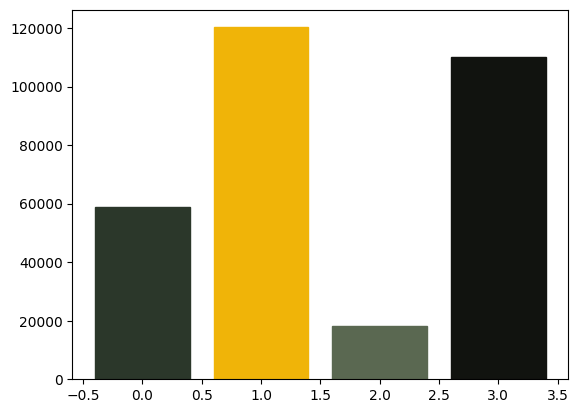

In [1]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
clusters = KMeans(n_clusters=4, n_init=2)
clusters.fit(numarray)
npbins = numpy.arange(0, 5)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)
barlist = plot.bar(labels, histogram[0])
for i in range(4):
    barlist[i].set_color(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )
plot.show()

Pour votre prochaine question, votre objectif est de comprendre le code ci-dessus et réaliser ce qui suit :

Supposer que le nombre de grappes est donné par l'utilisateur, généraliser le code ci-dessus.
En cas de diagramme à barres, assurez-vous que les barres sont disposées dans le ordre décroissant de la fréquence des couleurs.
Ajoutez également le support pour le graphique circulaire en plus du graphique en barres. Assurez-vous que que nous utilisons les couleurs de l'image comme les couleurs de la tranche.
Avez-vous des observations intéressantes ?

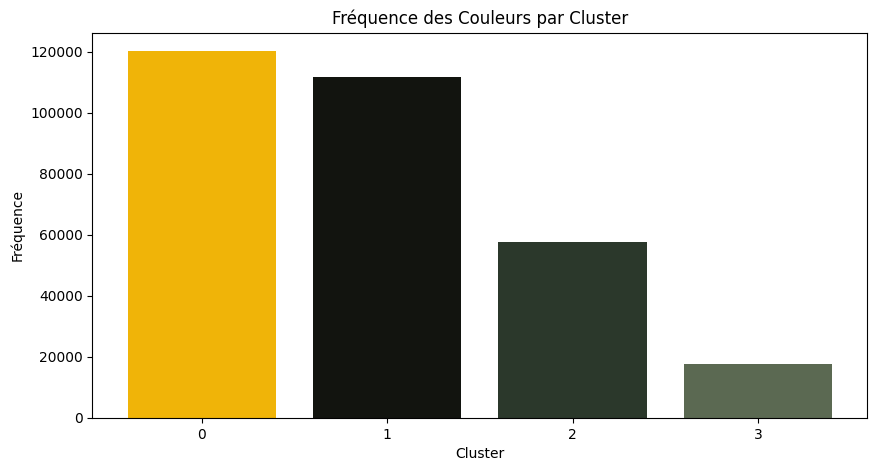

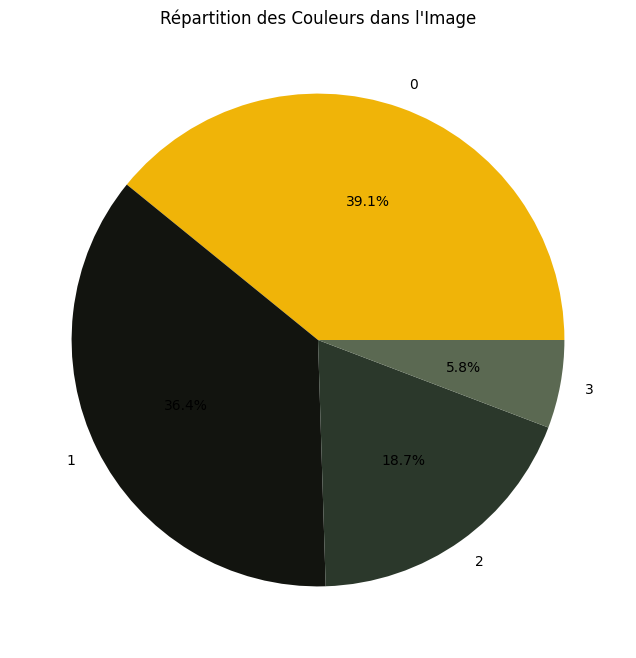

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Ouvrir l'image et la convertir en un tableau numpy
imgfile = Image.open("images/flower.jpg")
numarray = np.array(imgfile.getdata(), np.uint8)

# Permettre à l'utilisateur de spécifier le nombre de clusters
n_clusters = int(input("Entrez le nombre de clusters : "))

# Clustering KMeans
clusters = KMeans(n_clusters=n_clusters, n_init=2)
clusters.fit(numarray)

# Calculer l'histogramme des labels des clusters
npbins = np.arange(0, n_clusters + 1)
histogram, _ = np.histogram(clusters.labels_, bins=npbins)

# Trier les clusters par fréquence décroissante
sorted_idxs = np.argsort(-histogram)
sorted_histogram = histogram[sorted_idxs]
sorted_labels = np.arange(len(sorted_idxs))

# Couleurs pour chaque cluster
colors = [
    "#%02x%02x%02x" % tuple(np.ceil(clusters.cluster_centers_[i]).astype(int))
    for i in sorted_idxs
]

# Diagramme à barres
plt.figure(figsize=(10, 5))
barlist = plt.bar(sorted_labels, sorted_histogram, color=colors)
plt.title('Fréquence des Couleurs par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Fréquence')
plt.xticks(sorted_labels, labels=sorted_labels)
plt.show()

# Diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(sorted_histogram, labels=sorted_labels, colors=colors, autopct='%1.1f%%')
plt.title('Répartition des Couleurs dans l\'Image')
plt.show()
